<a href="https://colab.research.google.com/github/Madala-pavani/Online-Food-Order-Prediction/blob/main/onlinefoodPBL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import(accuracy_score,classification_report,confusion_matrix)


In [ ]:
d=pd.read_csv("onlinefoods.csv")

In [ ]:
d.shape

(388, 13)

In [ ]:
d.isnull().sum()

Age                          0
Gender                       0
MaritalStatus                0
Occupation                   0
MonthlyIncome                0
EducationalQualifications    0
FamilySize                   0
latitude                     0
longitude                    0
PinCode                      0
Output                       0
Feedback                     0
Unnamed: 12                  0
dtype: int64

In [ ]:
d.describe()

,Age,FamilySize,latitude,longitude,PinCode
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [ ]:
d.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
383     True
384     True
385     True
386    False
387     True
Length: 388, dtype: bool

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        388 non-null    int64  
 1   Gender                     388 non-null    object 
 2   MaritalStatus              388 non-null    object 
 3   Occupation                 388 non-null    object 
 4   MonthlyIncome              388 non-null    object 
 5   EducationalQualifications  388 non-null    object 
 6   FamilySize                 388 non-null    int64  
 7   latitude                   388 non-null    float64
 8   longitude                  388 non-null    float64
 9   PinCode                    388 non-null    int64  
 10  Output                     388 non-null    object 
 11  Feedback                   388 non-null    object 
 12  Unnamed: 12                388 non-null    object 
dtypes: float64(2), int64(3), object(8)
memory usage: 3

In [ ]:

categorical = [i for i in d.columns if d[i].dtype == 'object']
print('Categorical columns :',categorical)

numerical = [i for i in d.columns if d[i].dtype != 'object']
print('Numerical columns :',numerical)


Categorical columns : ['Gender', 'MaritalStatus', 'Occupation', 'MonthlyIncome', 'EducationalQualifications', 'Output', 'Feedback', 'Unnamed: 12']
Numerical columns : ['Age', 'FamilySize', 'latitude', 'longitude', 'PinCode']


In [ ]:
print(d['Gender'].unique())

['Female' 'Male']


In [ ]:
print(d['MaritalStatus'].unique())

['Single' 'Married' 'Prefer not to say']


In [ ]:
print(d['Occupation'].unique())

['Student' 'Employee' 'Self Employeed' 'House wife']


In [ ]:
print(d['MonthlyIncome'].unique())

['No Income' 'Below Rs.10000' 'More than 50000' '10001 to 25000'
 '25001 to 50000']


In [ ]:
print(d['EducationalQualifications'].unique())


['Post Graduate' 'Graduate' 'Ph.D' 'Uneducated' 'School']


In [ ]:
print(d['Output'].unique())


['Yes' 'No']


In [ ]:
print(d['Feedback'].unique())


['Positive' 'Negative ']


In [ ]:
print(d['Unnamed: 12'].unique())

['Yes' 'No']


In [ ]:
mappings = {
    'Gender': {'Female':0,'Male':1},
    'MaritalStatus':{'Single':0,'Married':1,'Prefer not to say':2},
    'Occupation':{'Student': 0, 'Employee': 1,'Self Employeed':2,'House wife':3},
    'MonthlyIncome':{'No Income':0,'Below Rs.10000':1 ,'10001 to 25000':2 ,'25001 to 50000':3,'More than 50000':4},
    'EducationalQualifications':{'Post Graduate':1,'Uneducated':0 ,'Graduate':2,'Ph.D': 3,'School':4},
    'Output':{'Yes': 1,'No':0},
    'Feedback':{'Positive':1, 'Negative ':0},
    'Unnamed: 12':{'Yes': 1,'No':0},
}

for column, mapping in mappings.items():
    d[column].replace(mapping, inplace=True)


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        388 non-null    int64  
 1   Gender                     388 non-null    int64  
 2   MaritalStatus              388 non-null    int64  
 3   Occupation                 388 non-null    int64  
 4   MonthlyIncome              388 non-null    int64  
 5   EducationalQualifications  388 non-null    int64  
 6   FamilySize                 388 non-null    int64  
 7   latitude                   388 non-null    float64
 8   longitude                  388 non-null    float64
 9   PinCode                    388 non-null    int64  
 10  Output                     388 non-null    int64  
 11  Feedback                   388 non-null    int64  
 12  Unnamed: 12                388 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 39.5 KB


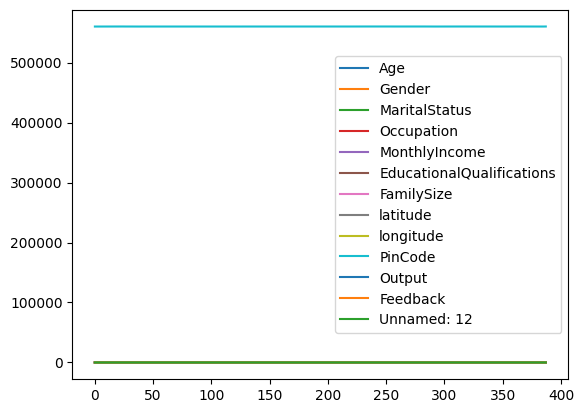

In [ ]:
d.plot()
plt.show()

<Axes: >

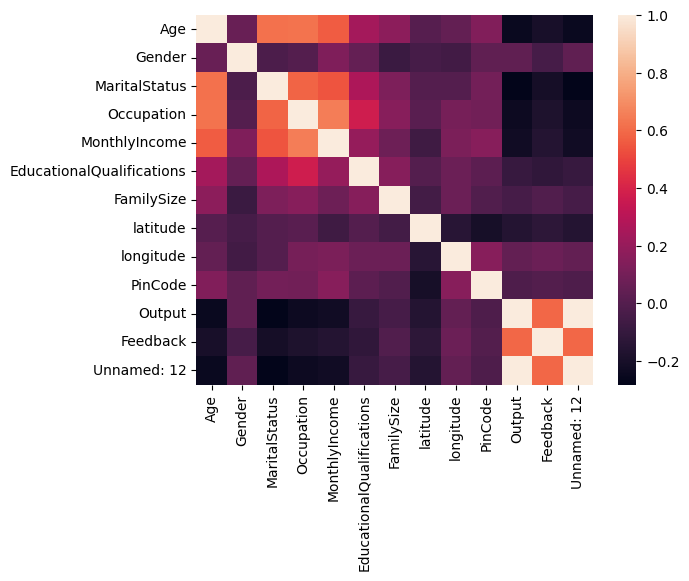

In [ ]:
d.corr()
sb.heatmap(d.corr())

In [ ]:
x=d.drop("Output",axis=1)
y=d["Output"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

In [ ]:
model=GaussianNB()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)


In [ ]:
accuracy_score(y_test,y_predict)

1.0

In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00       123

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156



In [ ]:
confusion_matrix(y_test,y_predict)

array([[ 37,   0],
       [  0, 119]])

In [ ]:
model1=DecisionTreeClassifier()
model1.fit(x_train,y_train)
y_predict1=model1.predict(x_test)

In [ ]:
accuracy_score(y_test,y_predict1)

1.0

In [ ]:
print(classification_report(y_test,y_predict1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00       119

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156



In [ ]:
confusion_matrix(y_test,y_predict1)

array([[ 37,   0],
       [  0, 119]])

In [ ]:
model2=KNeighborsClassifier(n_neighbors=5)
model2.fit(x_train,y_train)
y_predict2=model2.predict(x_test)

In [ ]:
accuracy_score(y_test,y_predict2)

0.7756410256410257

In [ ]:
print(classification_report(y_test,y_predict2))

              precision    recall  f1-score   support

           0       0.57      0.22      0.31        37
           1       0.80      0.95      0.87       119

    accuracy                           0.78       156
   macro avg       0.68      0.58      0.59       156
weighted avg       0.74      0.78      0.73       156



In [ ]:
confusion_matrix(y_test,y_predict2)

array([[  8,  29],
       [  6, 113]])

In [ ]:
model3=SVC()
model3.fit(x_train,y_train)
y_predict3=model3.predict(x_test)

In [ ]:
accuracy_score(y_test,y_predict3)

0.7628205128205128

In [ ]:
print(classification_report(y_test,y_predict3))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.76      1.00      0.87       119

    accuracy                           0.76       156
   macro avg       0.38      0.50      0.43       156
weighted avg       0.58      0.76      0.66       156



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(y_test,y_predict3)

array([[  0,  37],
       [  0, 119]])

In [ ]:
model4=AdaBoostClassifier(n_estimators=5)
model4.fit(x_train,y_train)
y_predict4=model4.predict(x_test)

In [ ]:
accuracy_score(y_test,y_predict4)

1.0

In [ ]:
print(classification_report(y_test,y_predict4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00       119

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156



In [ ]:
confusion_matrix(y_test,y_predict4)

array([[ 37,   0],
       [  0, 119]])

[Text(0.5, 0.75, 'x[11] <= 0.5\ngini = 0.338\nsamples = 232\nvalue = [50, 182]'), Text(0.25, 0.25, 'gini = 0.0\nsamples = 50\nvalue = [50, 0]'), Text(0.75, 0.25, 'gini = 0.0\nsamples = 182\nvalue = [0, 182]')]


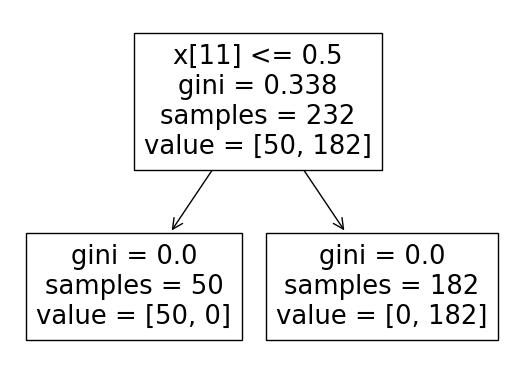

In [ ]:
print(plot_tree(model1))